<a href="https://colab.research.google.com/github/zjuiEMLab/rshub/blob/main/demo/Vegetation-demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uniform vs. Layered Vegetation Brightness Temperature

In [59]:
import datetime
import copy
!pip install rshub -q

## How would vertical distribution of vegetation structure impact Tb?

In [ ]:
# Define user token
# Register your account to get a token https://rshub.zju.edu.cn/Registration
token = 'ENTER YOUR TOKEN HERE' 
# Chang your task name or project name every time you run a new job
project_name = 'Demo3'
task_name1 = 'Layered Vegetation1'
task_name2 = 'Uniform Vegetation1'

### Step 1: Define Scenario flag

In [61]:
# ============== CHANGE YOUR INPUT PARAMETERS HERE ==============
# ====== Parameters not define will be set to default values ======

# 'soil: Bare soil
# 'snow: Snow
# 'veg: Vegetation covered soil
scenario_flag = 'veg'

### Step 2: Define observation description

In [62]:
# 1) Observation mode
# 'bs': Active (Backscatter)
# 'tb': Passive (Brightness temperature)
output_var = 'tb'

# 2) Observation characteristics
fGHz = 1.41

### Step 3: Define Algorithm flag

In [63]:
# 1: RT
algorithm = 'rt'

### Step 4: Describe your scenario

In [64]:
scatters1=[[]]
# Branch
types = 1 # 1: cylinder; 0: disc
VM = 0.37 # Volumetric Moisture 
L = 7.85 # Length of the scatterer [m]
D = 0.15 # Diameter of the scatterer [m]
beta1 = 0 # lower bound of orientation range of the scatterer (degree)
beta2 = 10 # upper bound of orientation range of the scatterer (degree)
disbot = 0 # lower bound of vertical distribution range of the scatterer
distop = 8 # upper bound of vertical distribution range of the scatterer
NA = 0.24 # density of the scatterer
scatters1[0]=[types, VM, L, D, beta1, beta2, disbot, distop, NA]

# Primary branch
types = 1 # 1: cylinder; 0: disc
VM = 0.501 # Volumetric Moisture 
L = 1.41 # Length of the scatterer [m]
D = 0.0288 # Diameter of the scatterer [m]
beta1 = 30 # lower bound of orientation range of the scatterer (degree)
beta2 = 90 # upper bound of orientation range of the scatterer (degree)
disbot = 2 # lower bound of vertical distribution range of the scatterer
distop = 3.5 # upper bound of vertical distribution range of the scatterer
NA = 3.12 # density of the scatterer
scatters1.append([types, VM, L, D, beta1, beta2, disbot, distop, NA])

# Secondary branch
types = 1 # 1: cylinder; 0: disc
VM = 0.444 # Volumetric Moisture 
L = 0.555 # Length of the scatterer [m]
D = 0.0112 # Diameter of the scatterer [m]
beta1 = 35 # lower bound of orientation range of the scatterer (degree)
beta2 = 90 # upper bound of orientation range of the scatterer (degree)
disbot = 2 # lower bound of vertical distribution range of the scatterer
distop = 5 # upper bound of vertical distribution range of the scatterer
NA = 34.32 # density of the scatterer
scatters1.append([types, VM, L, D, beta1, beta2, disbot, distop, NA])

# Leaf
types = 0 # 1: cylinder; 0: disc
VM = 0.58 # Volumetric Moisture 
L = 0.0001 # thickness of the scatterer [m]
D = 0.04 # Diameter of the scatterer [m]
beta1 = 0 # lower bound of orientation range of the scatterer (degree)
beta2 = 90 # upper bound of orientation range of the scatterer (degree)
disbot = 2 # lower bound of vertical distribution range of the scatterer
distop = 8 # upper bound of vertical distribution range of the scatterer
NA = 7712.64 # density of the scatterer
scatters1.append([types, VM, L, D, beta1, beta2, disbot, distop, NA])
print(scatters1)

[[1, 0.37, 7.85, 0.15, 0, 10, 0, 8, 0.24], [1, 0.501, 1.41, 0.0288, 30, 90, 2, 3.5, 3.12], [1, 0.444, 0.555, 0.0112, 35, 90, 2, 5, 34.32], [0, 0.58, 0.0001, 0.04, 0, 90, 2, 8, 7712.64]]


In [65]:
scatters2=copy.deepcopy(scatters1)
# Primary Branch distributed at 2 - 3.5 meters
scatters2[1][6] = 0
scatters2[1][7] = 8

# Secondary Branch distributed at 3.5 - 5 meters
scatters2[2][6] = 0
scatters2[2][7] = 8

# Leaves distributed at 5 - 8 meters
scatters2[3][6] = 0
scatters2[3][7] = 8
print(scatters2)

[[1, 0.37, 7.85, 0.15, 0, 10, 0, 8, 0.24], [1, 0.501, 1.41, 0.0288, 30, 90, 0, 8, 3.12], [1, 0.444, 0.555, 0.0112, 35, 90, 0, 8, 34.32], [0, 0.58, 0.0001, 0.04, 0, 90, 0, 8, 7712.64]]


In [66]:
data1 = {
    'scenario_flag': scenario_flag,
    'output_var': output_var,'fGHz': fGHz,
    'algorithm':algorithm,
    'scatters': scatters1,
    'project_name':project_name,
    'task_name':task_name1,
    'token': token,
    'level_required':1
}

data2 = {
    'scenario_flag': scenario_flag,
    'output_var': output_var,'fGHz': fGHz,
    'algorithm':algorithm,
    'scatters': scatters2,
    'project_name':project_name,
    'task_name':task_name2,
    'token': token,
    'level_required':1
}

## Run models

In [ ]:
from rshub import submit_jobs
result1=submit_jobs.run(data1)
result2=submit_jobs.run(data2)

In [ ]:
print(result1['result'])

In [ ]:
print(result2['result'])

In [ ]:
# Store log information
now = datetime.datetime.now()
logname = 'log_' + now.strftime("%Y%m%d%H%M%D") + '.txt'
f = open('log.txt',"a")
head_string = '======' + now.strftime("%Y%m%d%H%M%D") + '======' + "\n"
f.write(head_string)
f.write(f' project_name = {project_name} \n')
f.write(f' task_name = {task1_name} \n')
f.write(f' data = {data1} \n')
f.write(f' task_name = {task2_name} \n')
f.write(f' data = {data2} \n')
f.write('================================ \n')
f.close()

# Check Job Status (It may take a long time!)

In [67]:
from rshub import submit_jobs
result=submit_jobs.check_completion(token, project_name, task_name1)
print(result)

{'task_status': 'completed', 'project_name': 'Demo3', 'task_name': 'Layered Vegetation1'}


In [68]:
from rshub import submit_jobs
result=submit_jobs.check_completion(token, project_name, task_name2)
print(result)

{'task_status': 'completed', 'project_name': 'Demo3', 'task_name': 'Uniform Vegetation1'}


# Post Process

In [69]:
from rshub import load_file

In [70]:
data = load_file(token, project_name, task_name1,scenario_flag=scenario_flag,algorithm=algorithm,output_var=output_var)
data_multi = data.load_outputs(fGHz=fGHz)
# Read variables into python
TU_all = data_multi['TU_all'] # Tbs
theta_obs = data_multi['theta_obs'] # theta

File size: 0.00 MB
File is small (<= 50 MB), loading into memory...
Loading small file directly into memory...
Sucessfully loaded


In [71]:
data = load_file(token, project_name, task_name2,scenario_flag=scenario_flag,algorithm=algorithm,output_var=output_var)
data_multi2 = data.load_outputs(fGHz=fGHz)
# Read variables into python
TU_all2 = data_multi2['TU_all'] # Tbs
theta_obs2 = data_multi2['theta_obs'] # theta

File size: 0.00 MB
File is small (<= 50 MB), loading into memory...
Loading small file directly into memory...
Sucessfully loaded


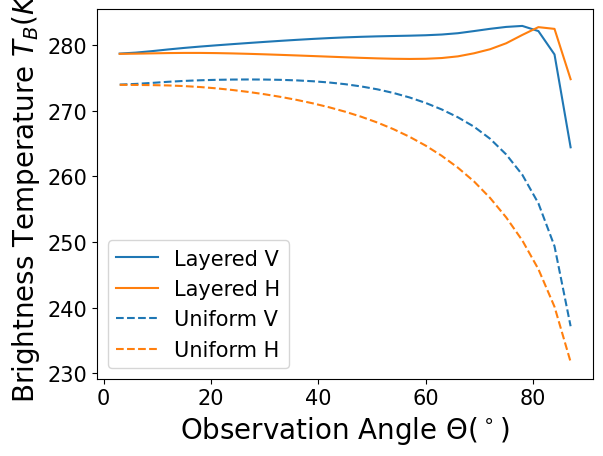

In [72]:
import matplotlib.pyplot as plt

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(theta_obs[0,:], TU_all[0,:], color='tab:blue')
ax.plot(theta_obs[0,:], TU_all[1,:], color='tab:orange')
ax.plot(theta_obs2[0,:], TU_all2[0,:], color='tab:blue',linestyle='--')
ax.plot(theta_obs2[0,:], TU_all2[1,:], color='tab:orange',linestyle='--')
ax.set_xlabel('Observation Angle $\Theta(^\circ)$', fontsize = 20) 
ax.set_ylabel('Brightness Temperature $T_B(K)$', fontsize = 20) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 
#ax.set(xlabel='Observation Angle $\Theta(^\circ)$', ylabel='Brightness Temperature $T_B(K)$')
ax.legend(['Layered V', 'Layered H', 'Uniform V', 'Uniform H'],fontsize = 15)